<a href="https://colab.research.google.com/github/Offliners/HTML_2021Fall/blob/main/Final%20Project/HTML2021_Fall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Directory**

```
data_dir
        ├── data
        │   ├── Test_IDs.csv
        │   ├── ...
        │   ├── status.csv
        ├── statistics
        │   ├── Churn Category.png
        │   ├── ...
        │   ├── Under 30.png
```

# **Display information of GPU**

In [1]:
!nvidia-smi

Sun Jan  9 15:42:13 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **Download Dataset**

In [2]:
!mkdir "./data"
!mkdir "./statistics"
!gdown --id 1X5yz7QLAu4nttnCea4ALf6alae6Clv_o --output "./data/dataset.zip"
!unzip -q "./data/dataset.zip" -d "./data"
!rm "./data/dataset.zip"

Downloading...
From: https://drive.google.com/uc?id=1X5yz7QLAu4nttnCea4ALf6alae6Clv_o
To: /content/data/dataset.zip
100% 660k/660k [00:00<00:00, 44.3MB/s]


# **Import Some Packages**

In [95]:
import time
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# **CSV Files Combination**

In [96]:
train_path = './data/Train_IDs.csv'  # path to training data
test_path = './data/Test_IDs.csv'    # path to testing data

files = glob('./data/*.csv')
data_csv = []
data_csv.append(train_path)
for csv in files:
    if ('IDs' not in csv) and ('sample' not in csv) and ('population' not in csv) and ('result' not in csv):
        data_csv.append(csv)
  
print(data_csv)
df_list = [pd.read_csv(file) for file in data_csv]

['./data/Train_IDs.csv', './data/demographics.csv', './data/location.csv', './data/status.csv', './data/services.csv', './data/satisfaction.csv']


In [97]:
print(df_list[0]) # Train IDs

     Customer ID
0     0650-BWOZN
1     0562-FGDCR
2     6688-UZPWD
3     2905-KFQUV
4     9720-JJJOR
...          ...
5629  1178-PZGAB
5630  4806-KEXQR
5631  8809-RIHDD
5632  6663-JOCQO
5633  7010-ZMVBF

[5634 rows x 1 columns]


In [98]:
result = df_list[0]
for df in df_list[1:]:
    result = pd.merge(result, df, how='outer', on='Customer ID')

result.to_csv('./data/result.csv') # Save combined result to result.csv

# There are 7043 total customer data
# Train_IDs has 5634 customer data
# Test_Ids has 1409 customer data
print(result)

     Customer ID  Count_x  ... Total Revenue  Satisfaction Score
0     0650-BWOZN      1.0  ...       3923.45                 1.0
1     0562-FGDCR      1.0  ...         35.90                 1.0
2     6688-UZPWD      1.0  ...       2182.45                 NaN
3     2905-KFQUV      1.0  ...        705.61                 3.0
4     9720-JJJOR      1.0  ...       3075.66                 NaN
...          ...      ...  ...           ...                 ...
7038  8049-WJCLQ      NaN  ...        291.39                 5.0
7039  7016-NVRIC      NaN  ...       3867.41                 5.0
7040  8263-JQAIK      NaN  ...           NaN                 3.0
7041  2754-SDJRD      NaN  ...           NaN                 1.0
7042  3251-YMVWZ      NaN  ...           NaN                 3.0

[7043 rows x 48 columns]


In [99]:
print(result.dropna()) # Find customer with full data info

     Customer ID  Count_x  ... Total Revenue  Satisfaction Score
666   0454-OKRCT      1.0  ...       2264.50                 4.0
678   1735-XMJVH      1.0  ...       4641.10                 5.0
1799  1245-HARPS      1.0  ...         98.35                 1.0
2805  8445-DNBAE      1.0  ...        712.85                 1.0
2883  8708-XPXHZ      1.0  ...       9825.79                 3.0
3062  9522-ZSINC      1.0  ...       4663.77                 4.0
4297  0836-SEYLU      1.0  ...        865.29                 3.0
5146  7274-RTAPZ      1.0  ...       7605.44                 5.0

[8 rows x 48 columns]


In [100]:
result_cols = result.columns
print(result_cols)

Index(['Customer ID', 'Count_x', 'Gender', 'Age', 'Under 30', 'Senior Citizen',
       'Married', 'Dependents', 'Number of Dependents', 'Count_y', 'Country',
       'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude',
       'Churn Category', 'Count', 'Quarter', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score'],
      dtype='object')


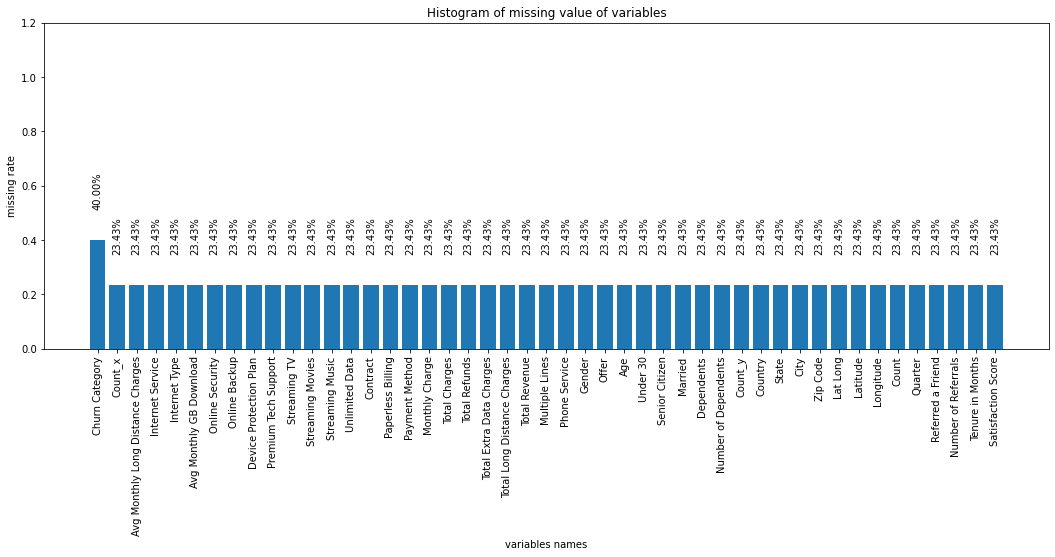

In [101]:
missing=result.isnull().sum().reset_index().rename(columns={0:'missNum'})
missing['missRate'] = missing['missNum'] / result.shape[0]
miss_analy = missing[missing.missRate>0].sort_values(by='missRate',ascending=False)

fig = plt.figure(figsize=(18,6))
plt.bar(np.arange(miss_analy.shape[0]), list(miss_analy.missRate.values), align = 'center')

plt.title('Histogram of missing value of variables')
plt.xlabel('variables names')
plt.ylabel('missing rate')
plt.xticks(np.arange(miss_analy.shape[0]),list(miss_analy['index']))
plt.xticks(rotation=90)
for x, y in enumerate(list(miss_analy.missRate.values)):
    plt.text(x, y + 0.12, '{:.2%}'.format(y), ha='center', rotation=90)    

plt.ylim([0,1.2])  
plt.savefig(f'./statistics/missRate.png')  
plt.show()
plt.close()

# **Statistics and Data Preprocessing**

In [102]:
result_copy = result.copy(deep=True)
def label_statistics(label):
    freq = result.groupby(label).size() 
    # print(freq)

    names = [name for name, _ in freq.items()]
    counts = [count for _, count in freq.items()]

    x = np.arange(len(names))
    plt.bar(x, counts)
    plt.xticks(x, names, rotation=15)
    plt.title(label)
    plt.savefig(f'./statistics/{label}.png')
    print(f'{label} saved')
    plt.close()

    # Replace NaN with the most frequent label
    result_copy[label] = result_copy[label].fillna(names[counts.index(max(counts))])

In [103]:
need_statistics_col = ['Churn Category', 'Satisfaction Score', 
       'Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents',
       'Number of Dependents', 'Country', 'State', 'City', 'Quarter',
       'Referred a Friend', 'Number of Referrals', 'Offer',
       'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method']

# Replace NaN with the most frequent label
for need_col in need_statistics_col:
    label_statistics(need_col)

    # Encode target labels with value
    le = LabelEncoder()
    result_copy[need_col] = le.fit_transform(result_copy[need_col])

    if need_col == 'Churn Category':
        encoder_map = dict(zip(le.classes_, le.transform(le.classes_)))

Churn Category saved
Satisfaction Score saved
Gender saved
Under 30 saved
Senior Citizen saved
Married saved
Dependents saved
Number of Dependents saved
Country saved
State saved
City saved
Quarter saved
Referred a Friend saved
Number of Referrals saved
Offer saved
Phone Service saved
Multiple Lines saved
Internet Service saved
Internet Type saved
Online Security saved
Online Backup saved
Device Protection Plan saved
Premium Tech Support saved
Streaming TV saved
Streaming Movies saved
Streaming Music saved
Unlimited Data saved
Contract saved
Paperless Billing saved
Payment Method saved


In [104]:
need_avg_col = [item for item in result_cols if item not in need_statistics_col]

# Replace NaN with average value or 0
for avg_col in need_avg_col[1:]:
    if avg_col == 'Zip Code' or avg_col == 'Lat Long':
        continue
    elif 'Count' in avg_col:
        result_copy[avg_col] = result_copy[avg_col].fillna(0)
    else:
        result_copy[avg_col] = result_copy[avg_col].fillna(result_copy[avg_col].mean())

# Throw away the data columns I think is useless
result_copy = result_copy.drop('Count_x', axis=1)
result_copy = result_copy.drop('Count_y', axis=1)
result_copy = result_copy.drop('Country', axis=1)
result_copy = result_copy.drop('State', axis=1)
result_copy = result_copy.drop('City', axis=1)
result_copy = result_copy.drop('Zip Code', axis=1)
result_copy = result_copy.drop('Lat Long', axis=1)
result_copy = result_copy.drop('Latitude', axis=1)
result_copy = result_copy.drop('Longitude', axis=1)
result_copy = result_copy.drop('Count', axis=1)
result_copy = result_copy.drop('Quarter', axis=1)

In [105]:
result_copy.to_csv('./data/result_after_preprocessing.csv') # Save after preprocessing result to result_after_preprocessing.csv

print(result_copy)

     Customer ID  Gender  ...  Total Revenue  Satisfaction Score
0     0650-BWOZN       1  ...    3923.450000                   0
1     0562-FGDCR       1  ...      35.900000                   0
2     6688-UZPWD       1  ...    2182.450000                   2
3     2905-KFQUV       1  ...     705.610000                   2
4     9720-JJJOR       0  ...    3075.660000                   2
...          ...     ...  ...            ...                 ...
7038  8049-WJCLQ       1  ...     291.390000                   4
7039  7016-NVRIC       1  ...    3867.410000                   4
7040  8263-JQAIK       1  ...    3044.441077                   2
7041  2754-SDJRD       1  ...    3044.441077                   0
7042  3251-YMVWZ       1  ...    3044.441077                   2

[7043 rows x 37 columns]


# **Train**

In [106]:
sc = StandardScaler()

y_train = result_copy['Churn Category'].values
X_train = result_copy.drop('Customer ID', axis=1)
X_train = X_train.drop('Churn Category', axis=1)

ss = StandardScaler().fit(X_train)
X_train_std = ss.transform(X_train)
mms = MinMaxScaler(feature_range=(0, 1)).fit(X_train_std)
X_train_std = mms.transform(X_train_std)

In [107]:
svm = SVC(kernel='rbf',  gamma=0.7, C=10)

start_time = time.time()
svm.fit(X_train_std, y_train)
end_time = time.time()

print(f'Training use {round(end_time - start_time, 3)}s')

Training use 5.239s


In [108]:
y_train_predict = svm.predict(X_train)
Ein = np.mean(np.array(y_train_predict) != y_train)
print(f'Ein = {round(Ein, 5)}')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Ein = 0.15732


# **Test**

In [109]:
df_test = pd.read_csv(test_path)

test_result = pd.merge(df_test, result_copy, how='inner', on='Customer ID')

X_test = test_result.drop('Customer ID', axis=1)
X_test = X_test.drop('Churn Category', axis=1)
ss = StandardScaler().fit(X_test)
X_test_std = ss.transform(X_test)
mms = MinMaxScaler(feature_range=(0, 1)).fit(X_test_std)
X_test_std = mms.transform(X_test_std)
y_test = svm.predict(X_test_std)

In [110]:
submit_result = './result.csv'

new_encoder_map = {'No Churn':0, 'Competitor': 1, 'Dissatisfaction':2, 'Attitude': 3, 'Price':4, 'Other':5}

with open(submit_result, 'w') as f:
    f.write('Customer ID,Churn Category\n')
    for i in range(len(df_test.values)):
        id = str(df_test.values[i]).replace('[\'', '')
        id = id.replace('\']', '')
        pred = new_encoder_map.get(list(encoder_map.keys())[list(encoder_map.values()).index(y_test[i])])
        f.write(f'{id},{pred}\n')

In [111]:
from google.colab import files

files.download(submit_result)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>